<a href="https://colab.research.google.com/github/hb0313/darknet-yolov4-object-detection/blob/main/darknet_yolov4_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Model files

Download model weight, configuration and classes.

In [1]:
!git lfs install
!git clone https://huggingface.co/hashb/darknet-yolov4-object-detection

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
Cloning into 'darknet-yolov4-object-detection'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [2]:
%cd darknet-yolov4-object-detection/

/content/darknet-yolov4-object-detection


## Run object detection

Run object detection on any image.

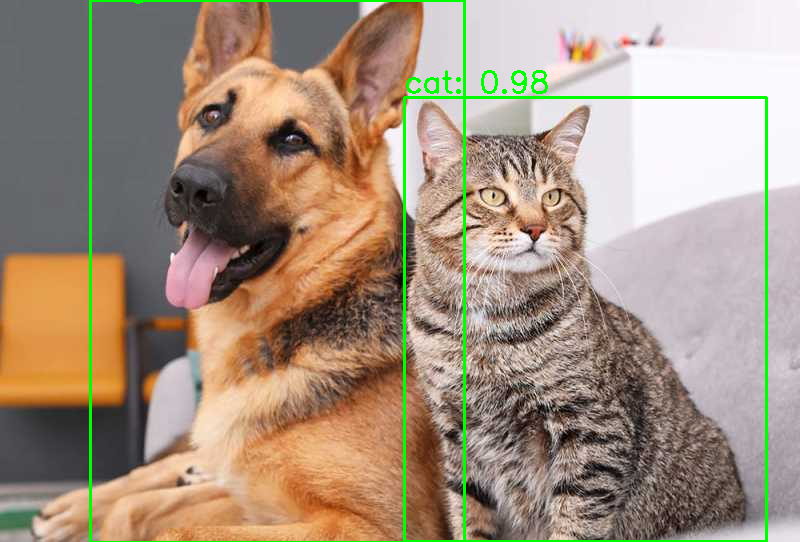

In [5]:
import cv2
from IPython.display import Image

img = cv2.imread('DOG.jpeg')

with open('coco.names', 'r') as f:
    classes = f.read().splitlines()

net = cv2.dnn.readNetFromDarknet('yolov4.cfg', 'yolov4.weights')

model = cv2.dnn_DetectionModel(net)
model.setInputParams(scale=1 / 255, size=(416, 416), swapRB=True)

classIds, scores, boxes = model.detect(img, confThreshold=0.6, nmsThreshold=0.4)

for (classId, score, box) in zip(classIds, scores, boxes):
    cv2.rectangle(img, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]),
                  color=(0, 255, 0), thickness=2)
    text = '%s: %.2f' % (classes[classId], score)
    cv2.putText(img, text, (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 1,
                color=(0, 255, 0), thickness=2)

cv2.imwrite('Image.png', img)
Image('Image.png')